<a href="https://colab.research.google.com/github/Arko2016/MyAnalyisInPython/blob/master/Linear_Regression_Assumptions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np 
import pandas as pd 
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

Data Ingestion:


1.   Upload data from Github
2.   Observe descriptive stats



In [0]:
url = 'https://raw.githubusercontent.com/Arko2016/Datasets/master/Advertising_data.csv'
adv_data = pd.read_csv(url,index_col="Unnamed: 0")
adv_data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [0]:
adv_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [0]:
adv_data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


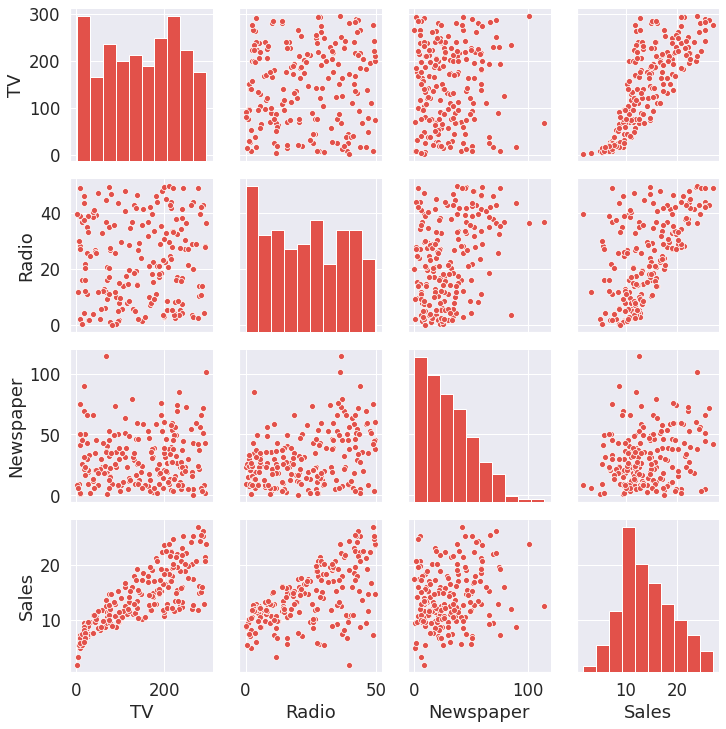

In [0]:
p = sns.pairplot(adv_data)

First Assumption: Linearity

Linear regression needs the relationship between the independent and dependent variables to be linear

By looking at the plots we can see that with the Sales variable the none of the independent variables form an accurately linear shape but TV and Radio do still better than Newspaper which seems to hardly have any specific shape

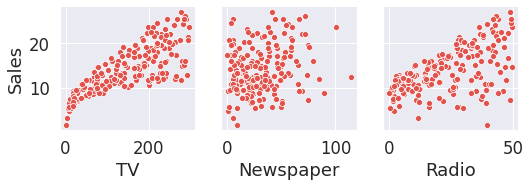

In [0]:
p = sns.pairplot(x_vars=["TV","Newspaper","Radio"], y_vars=['Sales'],data = adv_data)

For remaining assumptions, we fit the data to a linear model first. We perform the following steps:


1.   define independent and dependent variable
2.   standardize the independent variables
3.   fit the test data to a linear regression model
4.   generate predictions for test data
5.   calculate R-squared and Adj. R-squared




In [0]:
#step 1
x = adv_data.drop(['Sales'],axis = 1)
y = adv_data['Sales']

#step 2
sc = StandardScaler()
X = sc.fit_transform(x)

#Note: No need to split the data into train and test because we want to find the residuals for entire dataset
#X_train,X_test,y_train,y_test =   train_test_split(X,y,random_state = 0,test_size = 0.25)

#step 3
model_linear = linear_model.LinearRegression()
model_linear.fit(X,y)

#step 4
y_pred = model_linear.predict(X)

#step 5
rsq = r2_score(y_true = y,y_pred=y_pred)
print("R-squared: {}".format(rsq))

n = len(y)
p = X.shape[1]
adj_rsq = 1 - ((1 - rsq) * (n - 1)) / (n - p - 1)
print("Adj. R-squared: {}".format(adj_rsq))

R-squared: 0.8972106381789522
Adj. R-squared: 0.8956373316204668


Second Assumption: Mean of Residuals

The mean of residuals should be close to 0

Here we can observe that the residuals is very close to 0 

In [0]:
res = y - y_pred
print("Mean of residuals: {}".format(np.mean(res)))

Mean of residuals: -2.575717417130363e-16


Third Assumption: Homoskedasticity

The residuals should have almost equal variance across the regression line. By plotting the error terms with predicted terms we can check that there should not be any pattern in the error terms

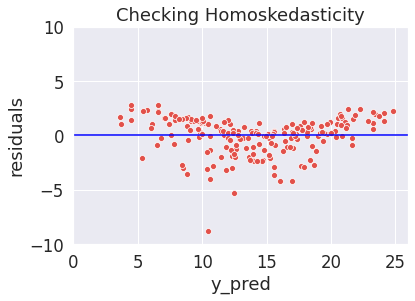

In [0]:
p = sns.scatterplot(y_pred,res)
plt.title("Checking Homoskedasticity of Residuals")
plt.xlabel('y_pred')
plt.ylabel('residuals')
plt.ylim([-10,10])
plt.xlim([0,26])
p = sns.lineplot([0,26],[0,0],color = 'blue')

Test for checking Homoskedasticity:

Goldfeld Quandt Test

Null Hypothesis: Residuals have equal variance


In [0]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(res, X)
print(lzip(name, test))

[('F statistic', 1.3437995226729404), ('p-value', 0.07369564428747298)]


Fourth Assumption: Normality of Residuals

The below plot shows that the residuals has a normal distribution, but also has a long right tail

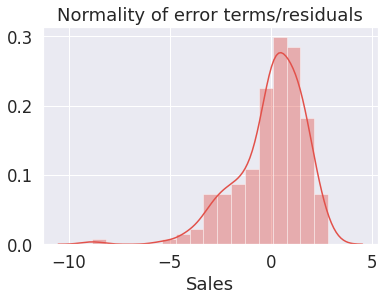

In [0]:
p = sns.distplot(res,kde=True)
p = plt.title('Normality of error terms/residuals')

Fifth Assumption: Residuals should not have autocorrelation

When the residuals are autocorrelated, it means that the current value is dependent of the previous (historic) values and that there is a definite unexplained pattern in the dependent variable that shows up in the error terms

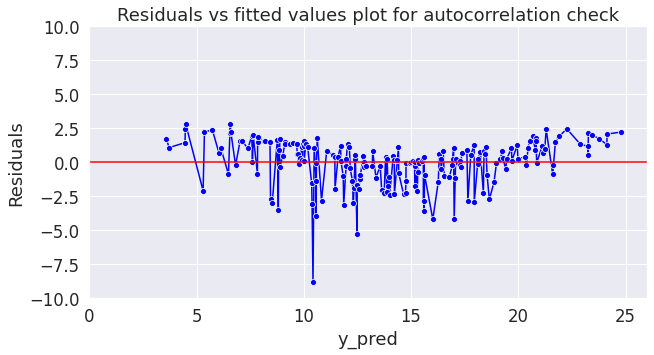

In [0]:
plt.figure(figsize=(10,5))
p = sns.lineplot(y_pred,res,marker='o',color='blue')
plt.xlabel('y_pred')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(0,26)
p = sns.lineplot([0,26],[0,0],color='red')
p = plt.title('Residuals vs fitted values plot for autocorrelation check')

Test for autocorrelation

Null Hypothesis: No autocorrelation exists

In [0]:
from statsmodels.stats import diagnostic as diag
min(diag.acorr_ljungbox(res , lags = 40)[1])

0.5041767432843907

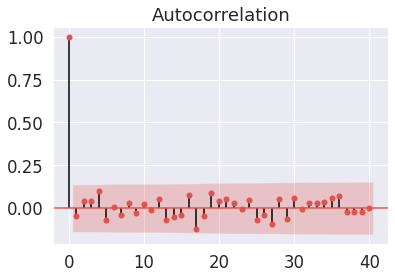

In [0]:
#autocorrelation plot
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(res, lags=40)
plt.show()

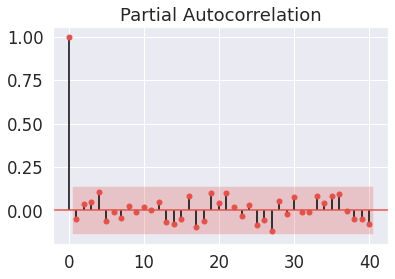

In [0]:
#partial autocorrelation
sm.graphics.tsa.plot_pacf(res, lags=40)
plt.show()

Sixth Assumption: Multicollinearity

In regression, multicollinearity refers to the extent to which independent variables are correlated. Multicollinearity affects the coefficients and p-values, but it does not influence the predictions, precision of the predictions, and the goodness-of-fit statistics.

If your primary goal is to make predictions, and you don’t need to understand the role of each independent variable, you don’t need to reduce severe multicollinearity

VIF (variance inflation factor) exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others

In [0]:
#define function to calculate VIF for the predictor variables
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
  vif_df = pd.DataFrame()
  vif_df['variables'] = X.columns
  vif_df['VIF_value'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
  return(vif_df)

In [0]:
#calculate VIF for the predictor variables
vif_df = calc_vif(x)
vif_df

,variables,VIF_value
0,TV,2.486772
1,Radio,3.285462
2,Newspaper,3.055245
